In [18]:
import pandas as pd

In [19]:
df = pd.read_csv('fcc-forum-pageviews.csv')
df.head()

,date,value
0,2016-05-09,1201
1,2016-05-10,2329
2,2016-05-11,1716
3,2016-05-12,10539
4,2016-05-13,6933


In [20]:
low = df['value'].quantile(0.05)
high = df['value'].quantile(0.95)
df = df[(df['value'] >= low) & (df['value'] <= high)]

df.head()

,date,value
39,2016-06-17,21691
40,2016-06-18,21681
42,2016-06-20,28508
43,2016-06-21,26805
47,2016-06-25,21923


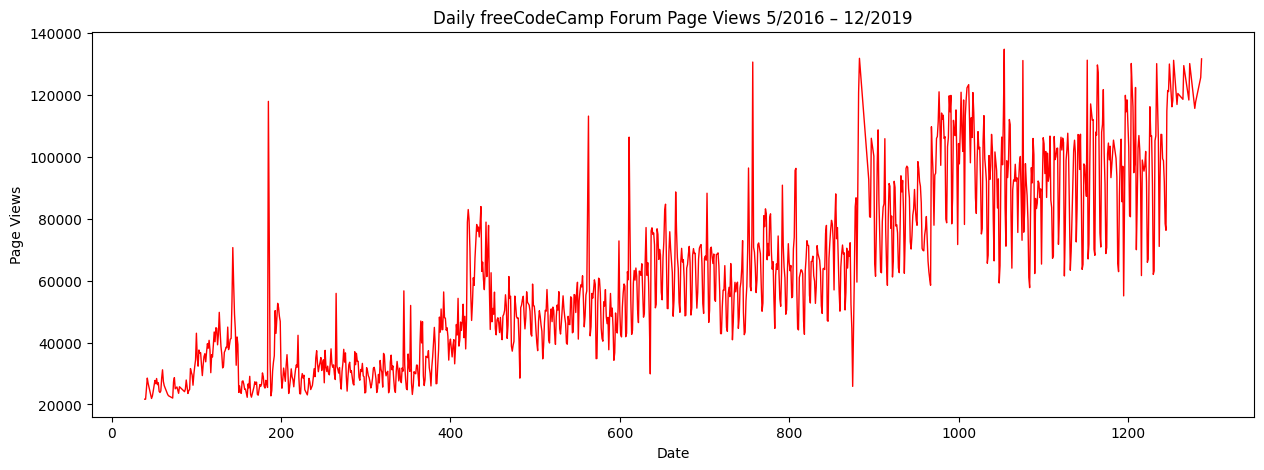

In [21]:
import matplotlib.pyplot as plt

def line_plot():
    fig, ax = plt.subplots(figsize=(15, 5))
    ax.plot(df.index, df['value'], color='red', linewidth=1)

    ax.set_title("Daily freeCodeCamp Forum Page Views 5/2016 – 12/2019")
    ax.set_xlabel("Date")
    ax.set_ylabel("Page Views")

    return fig

line_plot()
plt.show()

In [22]:
df = pd.read_csv(
    "fcc-forum-pageviews.csv",
    parse_dates=['date'], 
    index_col='date'       
)

In [23]:
df.index

DatetimeIndex(['2016-05-09', '2016-05-10', '2016-05-11', '2016-05-12',
               '2016-05-13', '2016-05-14', '2016-05-15', '2016-05-16',
               '2016-05-17', '2016-05-18',
               ...
               '2019-11-24', '2019-11-25', '2019-11-26', '2019-11-27',
               '2019-11-28', '2019-11-29', '2019-11-30', '2019-12-01',
               '2019-12-02', '2019-12-03'],
              dtype='datetime64[ns]', name='date', length=1304, freq=None)

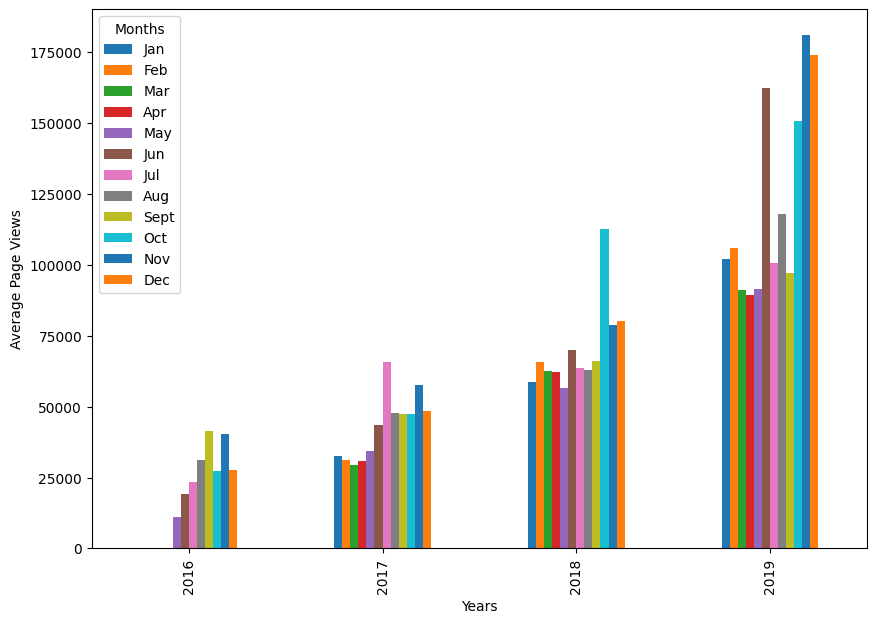

In [24]:
def draw_bar_plot():
    df_bar = df.copy()
    df_bar['year'] = df_bar.index.year
    df_bar['month'] = df_bar.index.month

    df_grouped = df_bar.groupby(['year', 'month'])['value'].mean().unstack()

    fig = df_grouped.plot(kind='bar', figsize=(10, 7)).figure

    plt.xlabel("Years")
    plt.ylabel("Average Page Views")
    plt.legend(title="Months", labels=[
        'Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun',
        'Jul', 'Aug', 'Sept', 'Oct', 'Nov', 'Dec'
    ])

    return fig

draw_bar_plot()
plt.show()


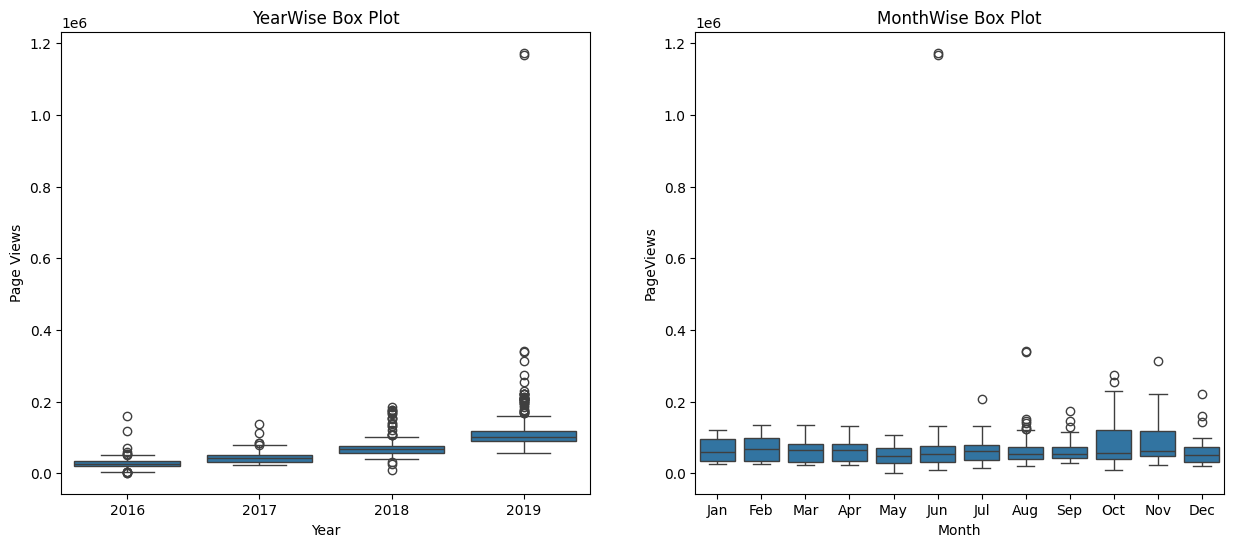

In [25]:
import seaborn as sns
import matplotlib.pyplot as plt

def box_plot():
    df_box = df.copy()
    df_box.reset_index(inplace=True)  
    df_box['year'] = df_box['date'].dt.year
    df_box['month'] = df_box['date'].dt.strftime('%b')

    month_order = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun',
                   'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']

    fig, axes = plt.subplots(1, 2, figsize=(15, 6))

    sns.boxplot(x="year", y="value", data=df_box, ax=axes[0])
    axes[0].set_title("YearWise Box Plot")
    axes[0].set_xlabel("Year")
    axes[0].set_ylabel("Page Views")

    sns.boxplot(x="month", y="value", data=df_box, order=month_order, ax=axes[1])
    axes[1].set_title("MonthWise Box Plot")
    axes[1].set_xlabel("Month")
    axes[1].set_ylabel("PageViews")

    return fig

box_plot()
plt.show()
